In [9]:
%run Get-data-raw-examples.ipynb
%run ../GP-emulation.ipynb
%run ../Variable-selection.ipynb

In [5]:
all_inputs = list(set(dfparams_of_interest.columns)-set(['member']))

# Some inputs are constant in the data set
unperturbed = ['acure_anth_so2', 'acure_carb_bb_ems', 'acure_carb_ff_ems', 'acure_carb_res_ems']

# Other inputs may or may not be excluded from the data with some discretion
few_inputs = [x for x in dfparams_of_interest.columns if 'ems' not in x and 'carb' not in x and x not in unperturbed]

print("All available inputs:", all_inputs)
print("Inputs not excluded:", few_inputs)

All available inputs: ['acure_carb_res_ems_chi', 'acure_dms', 'acure_prim_so4_diam', 'acure_dry_dep_acc', 'acure_carb_bb_ems_rnh', 'acure_carb_ff_ems_r', 'acure_carb_bb_ems', 'bparam', 'acure_carb_res_ems', 'acure_anth_so2_nam', 'acure_carb_res_ems_afr', 'acure_prim_moc', 'dbsdtbs_turb_0', 'acure_cloud_ph', 'acure_carb_ff_ems_chi', 'acure_dry_dep_ait', 'acure_ait_width', 'c_r_correl', 'acure_carb_res_ems_r', 'acure_oxidants_oh', 'acure_convective_plume_scavenging', 'acure_carb_res_ems_asi', 'acure_bl_nuc', 'acure_carb_ff_ems', 'acure_carb_bb_ems_sam', 'acure_carb_bb_ems_saf', 'acure_scav_diam', 'acure_carb_res_ems_lat', 'acure_dry_dep_so2', 'acure_sea_spray', 'acure_kappa_oc', 'acure_bc_ri', 'acure_autoconv_exp_lwp', 'acure_bvoc_soa', 'acure_anth_so2_chi', 'acure_carb_ff_ems_eur', 'acure_carb_res_diam', 'acure_carb_bb_ems_naf', 'acure_oxidants_o3', 'acure_carb_bb_diam', 'acure_rain_frac', 'acure_anth_so2_r', 'acure_carb_ff_ems_mar', 'acure_volc_so2', 'acure_carb_ff_ems_nam', 'acure_car

In [6]:
import pandas as pd

def set_up(df, time="12P", inputs=all_inputs, output="soluble_accumulation_mode"):
    
    my_data=df[df.time==time]
    
    return my_data[inputs], pd.DataFrame(my_data[output])

In [7]:
def check_ard_results(df, time, inputs, output):
    
    import numpy as np

    X, y = set_up(df, time="9A", inputs=inputs, output=output)

    my_model = train_GP_pipe(X, y)

    ard_results = ard(my_model, inputs)
    
    return ard_results

# Sample (a): Coastal (-0.625, -0.9375)

## August 1

In [16]:
print(coastal[coastal.time=="9A"])

      time  latitude  longitude member      dust  soluble_aitken_mode  \
69119   9A    -0.625    -0.9375    000  0.001340             0.011737   
69119   9A    -0.625    -0.9375    001  0.001291             0.003704   
69119   9A    -0.625    -0.9375    002  0.001019             0.004190   
69119   9A    -0.625    -0.9375    003  0.001783             0.001670   
69119   9A    -0.625    -0.9375    004  0.001552             0.061413   
...    ...       ...        ...    ...       ...                  ...   
69119   9A    -0.625    -0.9375    215  0.001544             0.018075   
69119   9A    -0.625    -0.9375    216  0.001060             0.006780   
69119   9A    -0.625    -0.9375    217  0.001447             0.003746   
69119   9A    -0.625    -0.9375    218  0.001885             0.004968   
69119   9A    -0.625    -0.9375    219  0.001842             0.004127   

       soluble_accumulation_mode  soluble_coarse_mode  insoluble_aitken_mode  \
69119                   0.743068           

## ARD

We check how ARD differs for different selections of inputs.

In [29]:
check_ard_results(coastal, "9A", all_inputs, "soluble_accumulation_mode")

array([('acure_anth_so2', 1.00000000e+00),
       ('acure_carb_bb_ems', 1.00000000e+00),
       ('acure_carb_ff_ems', 1.00000000e+00),
       ('acure_carb_res_ems', 1.00000000e+00),
       ('acure_dry_dep_acc', 1.43453369e+01),
       ('acure_bc_ri', 1.88518967e+01),
       ('acure_kappa_oc', 2.09152443e+01),
       ('acure_bvoc_soa', 2.29121503e+01),
       ('acure_prim_so4_diam', 2.72272414e+01),
       ('acure_cloud_ice_thresh', 3.32517344e+01),
       ('acure_dry_dep_ait', 4.43892518e+01),
       ('acure_carb_ff_diam', 4.65895108e+01),
       ('acure_dry_dep_so2', 4.69604037e+01),
       ('acure_volc_so2', 5.60287572e+01),
       ('acure_anth_so2_r', 6.52071297e+01),
       ('acure_dms', 6.95173899e+01), ('acure_sig_w', 7.52762068e+01),
       ('acure_sea_spray', 7.93206396e+01),
       ('acure_prim_moc', 9.02547311e+01),
       ('acure_convective_plume_scavenging', 1.04159656e+02),
       ('acure_carb_bb_ems_saf', 1.29902268e+02),
       ('acure_carb_res_ems_r', 1.33585595e+02),
 

In [11]:
check_ard_results(coastal, "9A", list(set(all_inputs) - set(unperturbed)), "soluble_accumulation_mode")

[('acure_dry_dep_acc', 1.43035070e+01) ('acure_bc_ri', 1.86826987e+01)
 ('acure_kappa_oc', 2.08365706e+01) ('acure_bvoc_soa', 2.27538055e+01)
 ('acure_prim_so4_diam', 2.68810425e+01)
 ('acure_cloud_ice_thresh', 3.26849369e+01)
 ('acure_dry_dep_ait', 4.47013789e+01)
 ('acure_carb_ff_diam', 4.61321009e+01)
 ('acure_dry_dep_so2', 4.68455863e+01) ('acure_volc_so2', 5.59235502e+01)
 ('acure_anth_so2_r', 6.44619016e+01) ('acure_dms', 6.86330652e+01)
 ('acure_sig_w', 7.45061652e+01) ('acure_sea_spray', 7.86867902e+01)
 ('acure_prim_moc', 9.03200984e+01)
 ('acure_convective_plume_scavenging', 1.03582623e+02)
 ('acure_carb_bb_ems_saf', 1.26702697e+02)
 ('acure_anth_so2_asi', 1.32438053e+02)
 ('acure_carb_res_ems_r', 1.32733105e+02) ('a_ent_1_rp', 2.05684771e+02)
 ('acure_bl_nuc', 1.82464507e+03)
 ('acure_carb_bb_ems_naf', 1.05082256e+04)
 ('acure_carb_ff_ems_nam', 1.93747264e+04)
 ('acure_carb_ff_ems_r', 2.27161582e+04)
 ('acure_carb_res_ems_asi', 2.29534866e+04)
 ('acure_carb_bb_ems_bnh', 2.30

In [13]:
coastal_ard = check_ard_results(coastal, "9A", few_inputs, "soluble_accumulation_mode")
print(coastal_ard)

[('acure_dry_dep_acc', 1.05614354e+01) ('acure_bvoc_soa', 1.50770420e+01)
 ('acure_bc_ri', 1.69313355e+01) ('acure_kappa_oc', 1.79965891e+01)
 ('acure_prim_so4_diam', 2.20243863e+01)
 ('acure_dry_dep_so2', 2.56751280e+01) ('acure_ait_width', 2.69509596e+01)
 ('acure_dry_dep_ait', 3.14713690e+01)
 ('acure_cloud_ice_thresh', 3.56432952e+01)
 ('acure_anth_so2_r', 4.82372011e+01) ('acure_dms', 5.06545022e+01)
 ('acure_prim_moc', 6.02560126e+01) ('acure_volc_so2', 6.45549613e+01)
 ('acure_autoconv_exp_lwp', 6.47192172e+01) ('a_ent_1_rp', 6.91654173e+01)
 ('acure_sea_spray', 7.21711585e+01) ('acure_sig_w', 8.84212823e+01)
 ('acure_convective_plume_scavenging', 1.18371339e+02)
 ('acure_anth_so2_asi', 1.44075251e+02) ('acure_bl_nuc', 7.39286149e+02)
 ('acure_anth_so2_nam', 5.74009210e+03) ('c_r_correl', 1.16176816e+04)
 ('acure_cloud_ph', 1.23754325e+04) ('m_ci', 1.25202915e+04)
 ('ai', 1.37370750e+04) ('acure_oxidants_oh', 1.53969039e+04)
 ('two_d_fsd_factor', 1.61179480e+04) ('bparam', 1.842

## Selection

In [18]:
coastal_selection = select_vars(coastal[coastal.time=="9A"], coastal_ard, "soluble_accumulation_mode", max_num_vars=10, folds=5)

print(coastal_selection)

/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

   num_vars                next_var      mean       std
0         1       acure_dry_dep_acc  0.100416  0.093346
1         2          acure_bvoc_soa  0.028335  0.003624
2         3             acure_bc_ri  0.027272  0.004946
3         4          acure_kappa_oc  0.013938  0.003113
4         5     acure_prim_so4_diam  0.011918  0.001246
5         6       acure_dry_dep_so2  0.010839  0.003511
6         7         acure_ait_width  0.012451  0.002504
7         8       acure_dry_dep_ait  0.011075  0.003018
8         9  acure_cloud_ice_thresh  0.011221  0.002558
9        10        acure_anth_so2_r  0.008857  0.001923


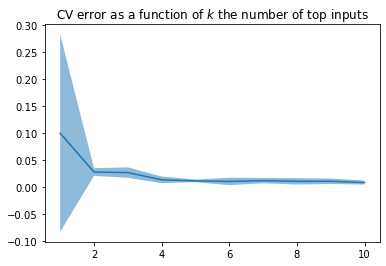

In [19]:
plot_cv_curve(coastal_selection)

## GP fit after selection

### 12 noon

In [28]:
inputs_to_train = coastal_selection['next_var'][0:4]

X, y = set_up(coastal, time="12P", inputs=few_inputs, output="soluble_accumulation_mode")

Selected inputs :  0    acure_dry_dep_acc
1       acure_bvoc_soa
2          acure_bc_ri
3       acure_kappa_oc
Name: next_var, dtype: object


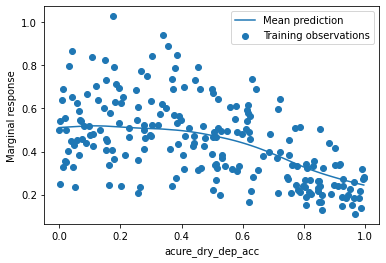

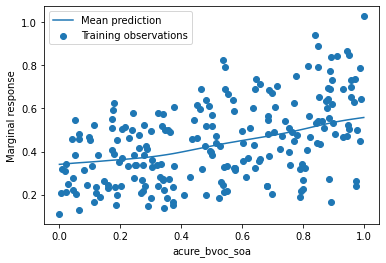

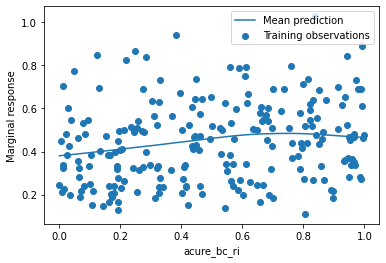

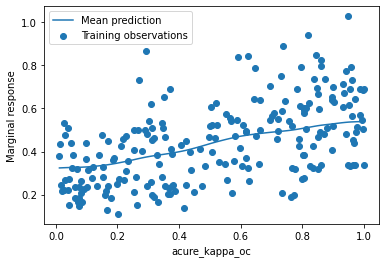

In [29]:
print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

### 9 AM

In [44]:
inputs_to_train = coastal_selection['next_var'][0:4]

X, y = set_up(coastal, time="9A", inputs=few_inputs, output="soluble_accumulation_mode")

Selected inputs :  0    acure_dry_dep_acc
1       acure_bvoc_soa
2          acure_bc_ri
3       acure_kappa_oc
Name: next_var, dtype: object


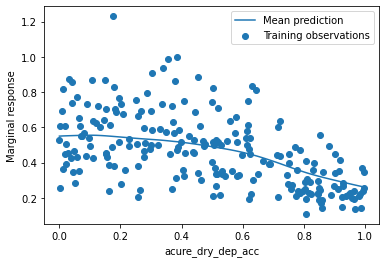

Json request to /api/1/dev/tc02d/SklearnGPRKernelMatern?action=build failed with response ServerResponse(statusCode=502, content='<html>\r\n<head><title>502 Bad Gateway</title></head>\r\n<body>\r\n<center><h1>502 Bad Gateway</h1></center>\r\n<hr><center>Microsoft-Azure-Application-Gateway/v2</center>\r\n</body>\r\n</html>\r\n', headers={'Server': 'Microsoft-Azure-Application-Gateway/v2', 'Date': 'Wed, 25 May 2022 19:49:21 GMT', 'Content-Type': 'text/html', 'Content-Length': '183', 'Connection': 'keep-alive'})


RuntimeError: Json request to /api/1/dev/tc02d/SklearnGPRKernelMatern?action=build failed with response ServerResponse(statusCode=502, content='<html>\r\n<head><title>502 Bad Gateway</title></head>\r\n<body>\r\n<center><h1>502 Bad Gateway</h1></center>\r\n<hr><center>Microsoft-Azure-Application-Gateway/v2</center>\r\n</body>\r\n</html>\r\n', headers={'Server': 'Microsoft-Azure-Application-Gateway/v2', 'Date': 'Wed, 25 May 2022 19:49:21 GMT', 'Content-Type': 'text/html', 'Content-Length': '183', 'Connection': 'keep-alive'})

In [45]:
print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

## August 26

[('acure_dry_dep_acc', 1.71459138e+01) ('acure_bvoc_soa', 1.88772296e+01)
 ('acure_prim_so4_diam', 1.99160278e+01) ('acure_bc_ri', 2.23585656e+01)
 ('acure_kappa_oc', 2.26876258e+01) ('m_ci', 2.67145725e+01)
 ('acure_dry_dep_so2', 6.13801891e+01)
 ('acure_dry_dep_ait', 7.59371730e+01)
 ('acure_anth_so2_r', 8.11307174e+01)
 ('acure_autoconv_exp_nd', 8.31607920e+01) ('ai', 8.33761844e+01)
 ('acure_cloud_ice_thresh', 8.57937145e+01)
 ('acure_sea_spray', 1.15329673e+02) ('acure_volc_so2', 1.17542397e+02)
 ('c_r_correl', 1.18356311e+02) ('acure_dms', 1.39595617e+02)
 ('a_ent_1_rp', 1.88298717e+02) ('dbsdtbs_turb_0', 2.66491114e+02)
 ('acure_prim_moc', 2.99165523e+02) ('acure_anth_so2_nam', 1.18791528e+04)
 ('two_d_fsd_factor', 1.98492979e+04)
 ('acure_convective_plume_scavenging', 2.11042303e+04)
 ('bparam', 2.61678461e+04) ('acure_cloud_ph', 3.25402988e+04)
 ('acure_anth_so2_asi', 3.29634397e+04)
 ('acure_autoconv_exp_lwp', 3.85632351e+04)
 ('acure_bl_nuc', 4.08195119e+04) ('acure_scav_dia

/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

   num_vars               next_var      mean       std
0         1      acure_dry_dep_acc  0.145928  0.109523
1         2         acure_bvoc_soa  0.030073  0.007835
2         3    acure_prim_so4_diam  0.028921  0.003535
3         4            acure_bc_ri  0.026535  0.005140
4         5         acure_kappa_oc  0.016316  0.003666
5         6                   m_ci  0.009376  0.002035
6         7      acure_dry_dep_so2  0.009345  0.001692
7         8      acure_dry_dep_ait  0.009212  0.001732
8         9       acure_anth_so2_r  0.008976  0.002241
9        10  acure_autoconv_exp_nd  0.007777  0.002255


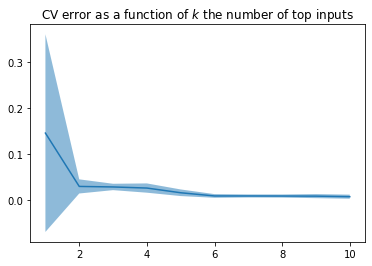

Selected inputs :  0      acure_dry_dep_acc
1         acure_bvoc_soa
2    acure_prim_so4_diam
3            acure_bc_ri
Name: next_var, dtype: object


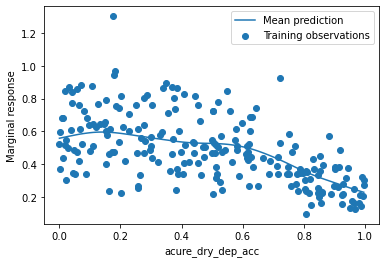

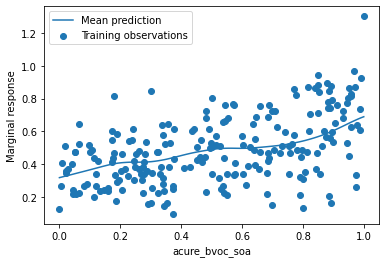

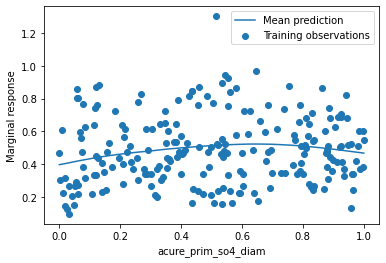

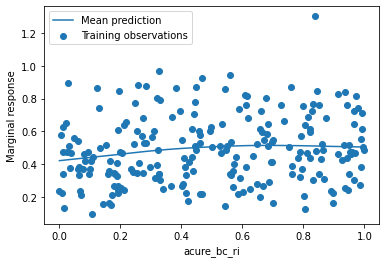

In [16]:
coastal2_ard = check_ard_results(coastal2, "9A", few_inputs, "soluble_accumulation_mode")
print(coastal2_ard)

coastal2_selection = select_vars(coastal2[coastal2.time=="9A"], coastal2_ard, "soluble_accumulation_mode", max_num_vars=10, folds=5)
print(coastal2_selection)

plot_cv_curve(coastal2_selection)

inputs_to_train = coastal2_selection['next_var'][0:4]

X, y = set_up(coastal2, time="12P", inputs=few_inputs, output="soluble_accumulation_mode")

print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

# Sample (c): Sudan (8.125, 38.4375)

## August 1

## ARD

In [5]:
check_ard_results(sudan, "9A", all_inputs, "soluble_accumulation_mode")

array([('acure_anth_so2', 1.00000000e+00),
       ('acure_carb_bb_ems', 1.00000000e+00),
       ('acure_carb_ff_ems', 1.00000000e+00),
       ('acure_carb_res_ems', 1.00000000e+00),
       ('acure_prim_so4_diam', 1.17668331e+01),
       ('acure_dry_dep_acc', 1.85368481e+01), ('m_ci', 2.19022530e+01),
       ('acure_bvoc_soa', 3.21782720e+01),
       ('acure_anth_so2_asi', 4.57082651e+01),
       ('acure_carb_bb_ems_rnh', 4.98060027e+01),
       ('acure_kappa_oc', 5.07259376e+01),
       ('acure_volc_so2', 5.24713141e+01),
       ('acure_carb_ff_diam', 5.78396698e+01),
       ('acure_cloud_ph', 7.58931211e+01),
       ('acure_bc_ri', 7.95907761e+01), ('acure_dms', 9.30123377e+01),
       ('acure_anth_so2_r', 9.51960022e+01),
       ('dbsdtbs_turb_0', 1.03271534e+02), ('ai', 1.07565450e+02),
       ('acure_dry_dep_ait', 1.51573861e+02),
       ('acure_carb_ff_ems_nam', 1.54741744e+02),
       ('acure_carb_res_ems_afr', 1.59425966e+02),
       ('acure_carb_res_ems_r', 1.61950152e+02),
   

In [6]:
check_ard_results(sudan, "9A", list(set(all_inputs) - set(unperturbed)), "soluble_accumulation_mode")

array([('acure_prim_so4_diam', 1.17665622e+01),
       ('acure_dry_dep_acc', 1.85393381e+01), ('m_ci', 2.19004286e+01),
       ('acure_bvoc_soa', 3.21736030e+01),
       ('acure_anth_so2_asi', 4.57022913e+01),
       ('acure_carb_bb_ems_rnh', 4.97667459e+01),
       ('acure_kappa_oc', 5.07351269e+01),
       ('acure_volc_so2', 5.24934726e+01),
       ('acure_carb_ff_diam', 5.78456999e+01),
       ('acure_cloud_ph', 7.58622282e+01),
       ('acure_bc_ri', 7.96417127e+01), ('acure_dms', 9.30602539e+01),
       ('acure_anth_so2_r', 9.52263926e+01),
       ('dbsdtbs_turb_0', 1.03240820e+02), ('ai', 1.07582460e+02),
       ('acure_dry_dep_ait', 1.51615080e+02),
       ('acure_carb_ff_ems_nam', 1.54922044e+02),
       ('acure_carb_res_ems_afr', 1.59474428e+02),
       ('acure_carb_res_ems_r', 1.61927492e+02),
       ('acure_dry_dep_so2', 1.99277302e+02),
       ('acure_scav_diam', 2.02636082e+02),
       ('acure_carb_bb_ems_bnh', 2.35898128e+02),
       ('acure_carb_bb_ems_sam', 2.90532329e+

In [20]:
sudan_ard = check_ard_results(sudan, "9A", few_inputs, "soluble_accumulation_mode")
print(sudan_ard)

[('acure_prim_so4_diam', 9.17064483e+00)
 ('acure_dry_dep_acc', 1.24289409e+01) ('acure_bvoc_soa', 1.62835988e+01)
 ('acure_dms', 2.81255590e+01) ('m_ci', 2.85143744e+01)
 ('acure_anth_so2_asi', 3.29317678e+01) ('acure_kappa_oc', 3.67701449e+01)
 ('acure_volc_so2', 3.77031441e+01) ('acure_anth_so2_r', 4.08798000e+01)
 ('acure_bc_ri', 4.76556299e+01)
 ('acure_cloud_ice_thresh', 6.43532956e+01) ('a_ent_1_rp', 6.50949678e+01)
 ('acure_cloud_ph', 6.80308112e+01) ('acure_rain_frac', 8.53309574e+01)
 ('ai', 9.41099069e+01) ('dbsdtbs_turb_0', 1.06878587e+02)
 ('acure_dry_dep_ait', 1.29044764e+02) ('acure_scav_diam', 1.79329862e+02)
 ('acure_convective_plume_scavenging', 2.20253939e+02)
 ('acure_dry_dep_so2', 3.74439917e+03)
 ('acure_autoconv_exp_nd', 4.94857614e+03) ('c_r_correl', 5.62871807e+03)
 ('bparam', 5.83740873e+03) ('acure_ait_width', 6.04089116e+03)
 ('acure_anth_so2_nam', 8.07525620e+03) ('acure_bl_nuc', 8.43494155e+03)
 ('acure_sig_w', 8.52141922e+03)
 ('acure_autoconv_exp_lwp', 8

## Selection

In [21]:
sudan_selection = select_vars(sudan[sudan.time=="9A"], sudan_ard, "soluble_accumulation_mode", max_num_vars=10, folds=5)

print(sudan_selection)

/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

   num_vars             next_var      mean       std
0         1  acure_prim_so4_diam  0.015230  0.002577
1         2    acure_dry_dep_acc  0.007390  0.001896
2         3       acure_bvoc_soa  0.006986  0.001530
3         4            acure_dms  0.005140  0.002071
4         5                 m_ci  0.004034  0.000656
5         6   acure_anth_so2_asi  0.003696  0.000828
6         7       acure_kappa_oc  0.003872  0.001082
7         8       acure_volc_so2  0.003095  0.000939
8         9     acure_anth_so2_r  0.003062  0.001037
9        10          acure_bc_ri  0.002950  0.000726


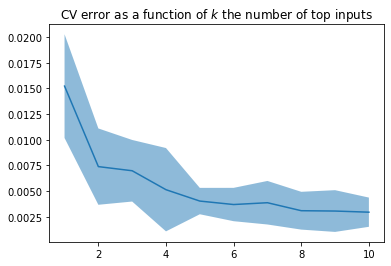

In [22]:
plot_cv_curve(sudan_selection)

## GP fit after selection

### 12 noon

In [32]:
inputs_to_train = sudan_selection['next_var'][0:10]

X, y = set_up(sudan, time="12P", inputs=few_inputs, output="soluble_accumulation_mode")

Selected inputs :  0    acure_prim_so4_diam
1      acure_dry_dep_acc
2         acure_bvoc_soa
3              acure_dms
4                   m_ci
5     acure_anth_so2_asi
6         acure_kappa_oc
7         acure_volc_so2
8       acure_anth_so2_r
9            acure_bc_ri
Name: next_var, dtype: object


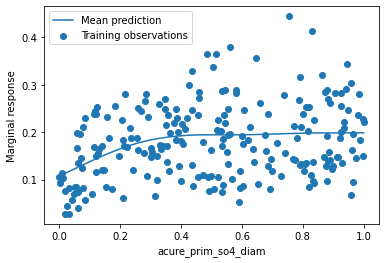

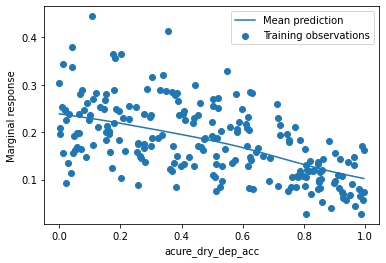

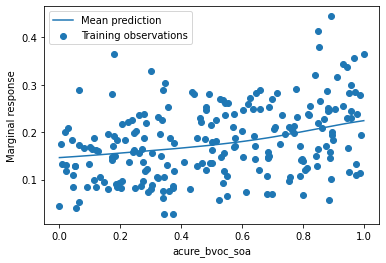

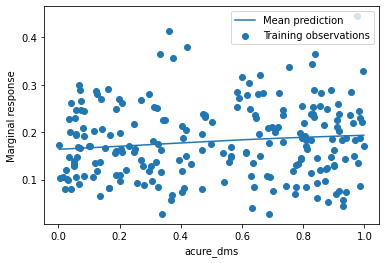

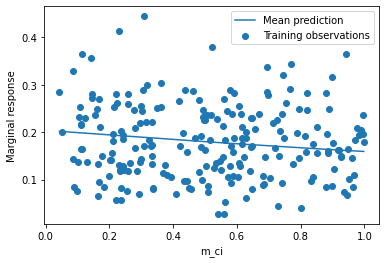

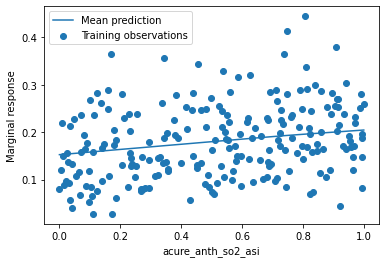

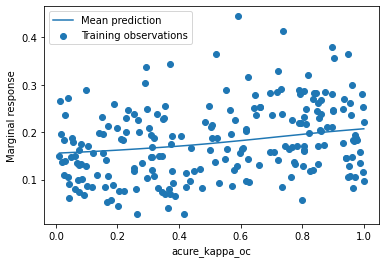

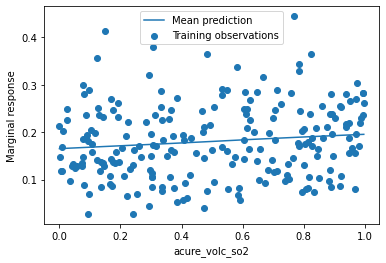

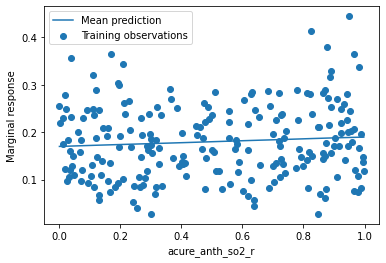

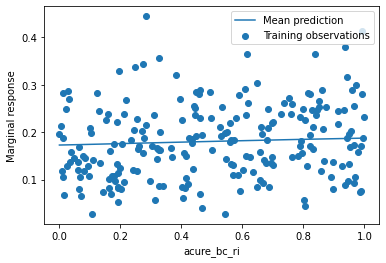

In [33]:
print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

### 9 AM

In [38]:
inputs_to_train = sudan_selection['next_var'][0:10]

X, y = set_up(sudan, time="9A", inputs=few_inputs, output="soluble_accumulation_mode")

Selected inputs :  0    acure_prim_so4_diam
1      acure_dry_dep_acc
2         acure_bvoc_soa
3              acure_dms
4                   m_ci
5     acure_anth_so2_asi
6         acure_kappa_oc
7         acure_volc_so2
8       acure_anth_so2_r
9            acure_bc_ri
Name: next_var, dtype: object


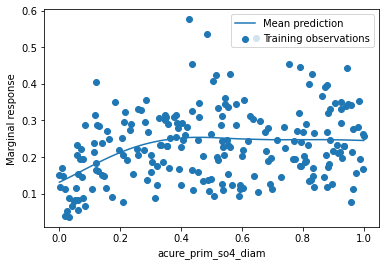

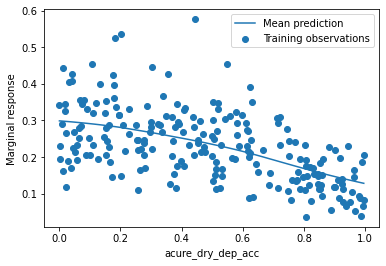

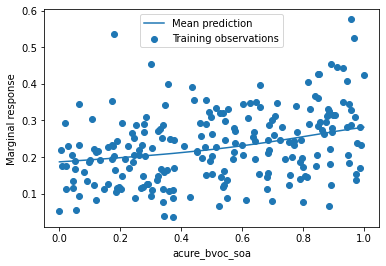

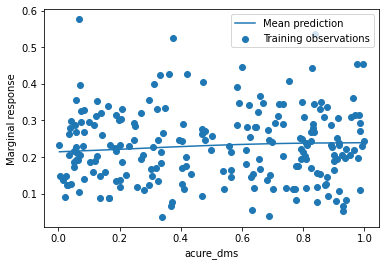

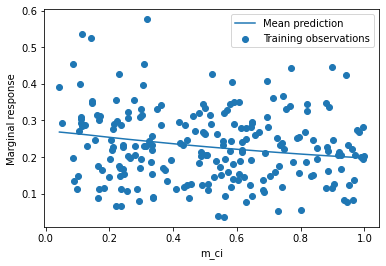

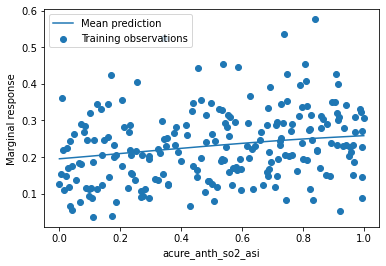

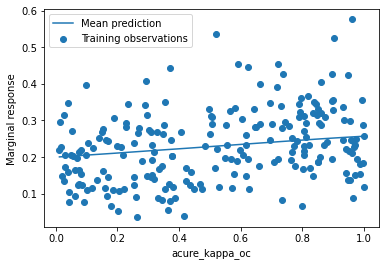

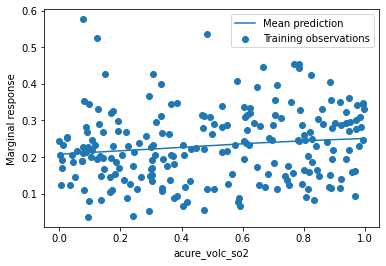

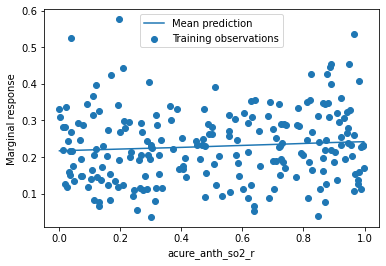

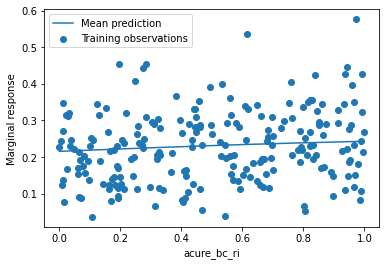

In [39]:
print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

## August 26

[('ai', 9.67479325e+00) ('acure_dry_dep_acc', 9.68772348e+00)
 ('acure_volc_so2', 1.12838425e+01)
 ('acure_prim_so4_diam', 1.28009993e+01)
 ('acure_anth_so2_asi', 1.38626937e+01) ('acure_bvoc_soa', 1.70399311e+01)
 ('m_ci', 1.98843372e+01) ('acure_sig_w', 2.05610536e+01)
 ('a_ent_1_rp', 3.12493300e+01) ('acure_kappa_oc', 3.15435415e+01)
 ('acure_scav_diam', 3.45468145e+01) ('acure_prim_moc', 3.64682967e+01)
 ('acure_dry_dep_so2', 4.08004289e+01) ('acure_dms', 4.76156026e+01)
 ('acure_anth_so2_r', 5.00616301e+01)
 ('acure_convective_plume_scavenging', 5.50546612e+01)
 ('acure_sea_spray', 6.73166922e+01) ('acure_cloud_ph', 8.29626687e+01)
 ('acure_anth_so2_chi', 9.46967173e+01)
 ('acure_rain_frac', 9.86219899e+01) ('acure_oxidants_oh', 2.21467223e+03)
 ('acure_bl_nuc', 1.28461724e+04) ('member', 1.36549240e+04)
 ('c_r_correl', 2.67346686e+04) ('acure_autoconv_exp_nd', 3.27829538e+04)
 ('acure_bc_ri', 3.43495797e+04) ('acure_anth_so2_eur', 4.03559996e+04)
 ('acure_autoconv_exp_lwp', 4.439

/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

   num_vars             next_var      mean       std
0         1                   ai  0.162630  0.087422
1         2    acure_dry_dep_acc  0.035394  0.008182
2         3       acure_volc_so2  0.025358  0.001565
3         4  acure_prim_so4_diam  0.028944  0.003735
4         5   acure_anth_so2_asi  0.017365  0.004733
5         6       acure_bvoc_soa  0.016094  0.004497
6         7                 m_ci  0.012578  0.003908
7         8          acure_sig_w  0.012559  0.002441
8         9           a_ent_1_rp  0.011696  0.002437
9        10       acure_kappa_oc  0.011361  0.001480


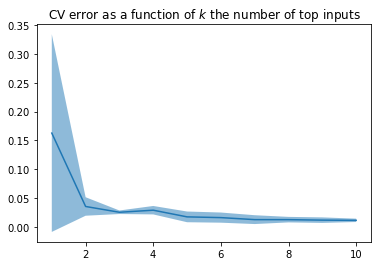

Selected inputs :  0                     ai
1      acure_dry_dep_acc
2         acure_volc_so2
3    acure_prim_so4_diam
Name: next_var, dtype: object


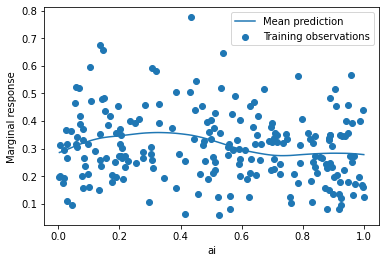

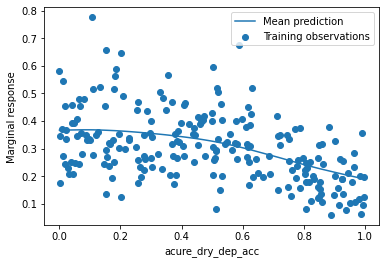

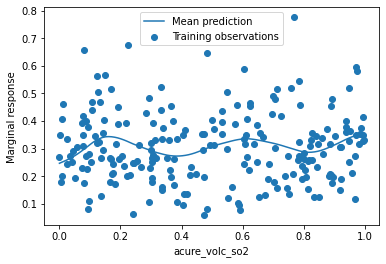

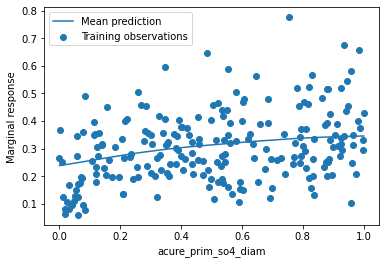

In [17]:
sudan2_ard = check_ard_results(sudan2, "9A", few_inputs, "soluble_accumulation_mode")
print(sudan2_ard)

sudan2_selection = select_vars(sudan2[sudan2.time=="9A"], sudan2_ard, "soluble_accumulation_mode", max_num_vars=10, folds=5)
print(sudan2_selection)

plot_cv_curve(sudan2_selection)

inputs_to_train = sudan2_selection['next_var'][0:4]

X, y = set_up(sudan2, time="12P", inputs=few_inputs, output="soluble_accumulation_mode")

print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

# Sample (e): Mid-ocean (-29.375, -27.1875)

## August 1

## ARD

In [8]:
check_ard_results(midocean, "9A", all_inputs, "soluble_accumulation_mode")

array([('acure_anth_so2', 1.00000000e+00),
       ('acure_carb_bb_ems', 1.00000000e+00),
       ('acure_carb_ff_ems', 1.00000000e+00),
       ('acure_carb_res_ems', 1.00000000e+00),
       ('acure_prim_so4_diam', 1.77647767e+01),
       ('acure_sea_spray', 1.82768463e+01),
       ('acure_dry_dep_acc', 2.15346016e+01),
       ('acure_dms', 4.01881129e+01),
       ('acure_carb_ff_ems_mar', 9.05116580e+01),
       ('acure_carb_bb_ems_bnh', 1.12136824e+02),
       ('acure_bc_ri', 1.25057430e+02),
       ('acure_volc_so2', 1.75818787e+02),
       ('acure_oxidants_oh', 1.97730886e+02),
       ('acure_carb_ff_diam', 2.32430178e+02),
       ('acure_convective_plume_scavenging', 2.55047033e+02),
       ('a_ent_1_rp', 2.81671897e+02),
       ('two_d_fsd_factor', 4.13209029e+02),
       ('c_r_correl', 4.82397229e+02),
       ('acure_anth_so2_chi', 1.77692641e+03),
       ('acure_cloud_ice_thresh', 9.10006842e+03),
       ('acure_rain_frac', 1.35142079e+04),
       ('acure_carb_res_ems_afr', 1.443

In [9]:
check_ard_results(midocean, "9A", list(set(all_inputs) - set(unperturbed)), "soluble_accumulation_mode")

array([('acure_prim_so4_diam', 1.77495784e+01),
       ('acure_sea_spray', 1.82605381e+01),
       ('acure_dry_dep_acc', 2.15179228e+01),
       ('acure_dms', 4.01364712e+01),
       ('acure_carb_ff_ems_mar', 9.04714520e+01),
       ('acure_carb_bb_ems_bnh', 1.12035617e+02),
       ('acure_bc_ri', 1.24745581e+02),
       ('acure_volc_so2', 1.75630932e+02),
       ('acure_oxidants_oh', 1.97615505e+02),
       ('acure_carb_ff_diam', 2.32480852e+02),
       ('acure_convective_plume_scavenging', 2.54482402e+02),
       ('a_ent_1_rp', 2.82225938e+02),
       ('two_d_fsd_factor', 4.13351447e+02),
       ('c_r_correl', 4.85404387e+02),
       ('acure_anth_so2_chi', 1.90583536e+03),
       ('acure_cloud_ice_thresh', 9.57291266e+03),
       ('acure_rain_frac', 1.39952648e+04),
       ('acure_carb_res_ems_afr', 1.65737522e+04),
       ('acure_carb_ff_ems_asi', 2.42493664e+04),
       ('acure_carb_bb_ems_rnh', 2.53838054e+04),
       ('acure_carb_ff_ems_r', 2.72251706e+04),
       ('acure_carb_re

In [23]:
midocean_ard = check_ard_results(midocean, "9A", few_inputs, "soluble_accumulation_mode")
print(midocean_ard)

[('acure_sea_spray', 1.22673706e+01)
 ('acure_prim_so4_diam', 1.30795043e+01)
 ('acure_dry_dep_acc', 1.93381963e+01) ('acure_dms', 2.53301061e+01)
 ('acure_convective_plume_scavenging', 4.16626874e+01)
 ('acure_bc_ri', 9.58244052e+01) ('dbsdtbs_turb_0', 9.94427030e+01)
 ('acure_volc_so2', 1.58096021e+02) ('acure_oxidants_oh', 2.21700992e+02)
 ('a_ent_1_rp', 3.20074835e+02) ('two_d_fsd_factor', 3.58168327e+02)
 ('acure_sig_w', 1.00936715e+04)
 ('acure_cloud_ice_thresh', 1.53032385e+04)
 ('acure_dry_dep_so2', 1.81153267e+04) ('ai', 2.60307873e+04)
 ('acure_dry_dep_ait', 2.92969888e+04) ('acure_bl_nuc', 3.24345765e+04)
 ('acure_autoconv_exp_lwp', 3.53426272e+04)
 ('acure_ait_width', 3.79779856e+04) ('c_r_correl', 3.81671482e+04)
 ('acure_rain_frac', 3.93283326e+04) ('acure_anth_so2_r', 4.49869606e+04)
 ('acure_autoconv_exp_nd', 4.65810244e+04)
 ('acure_scav_diam', 4.80643515e+04)
 ('acure_anth_so2_chi', 5.22262844e+04) ('acure_prim_moc', 5.37190760e+04)
 ('acure_anth_so2_asi', 6.59144009e

## Selection

In [24]:
midocean_selection = select_vars(midocean[midocean.time=="9A"], midocean_ard, "soluble_accumulation_mode", max_num_vars=10, folds=5)

print(midocean_selection)

/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

   num_vars                           next_var      mean       std
0         1                    acure_sea_spray  0.000631  0.000097
1         2                acure_prim_so4_diam  0.000444  0.000100
2         3                  acure_dry_dep_acc  0.000212  0.000057
3         4                          acure_dms  0.000098  0.000031
4         5  acure_convective_plume_scavenging  0.000096  0.000022
5         6                        acure_bc_ri  0.000083  0.000015
6         7                     dbsdtbs_turb_0  0.000099  0.000032
7         8                     acure_volc_so2  0.000087  0.000024
8         9                  acure_oxidants_oh  0.000093  0.000012
9        10                         a_ent_1_rp  0.000092  0.000024


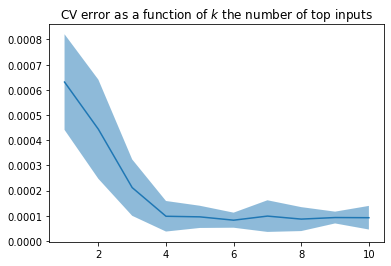

In [25]:
plot_cv_curve(midocean_selection)

## GP fit after selection

### 12 noon

In [34]:
inputs_to_train = midocean_selection['next_var'][0:4]

X, y = set_up(midocean, time="12P", inputs=few_inputs, output="soluble_accumulation_mode")

Selected inputs :  0        acure_sea_spray
1    acure_prim_so4_diam
2      acure_dry_dep_acc
3              acure_dms
Name: next_var, dtype: object


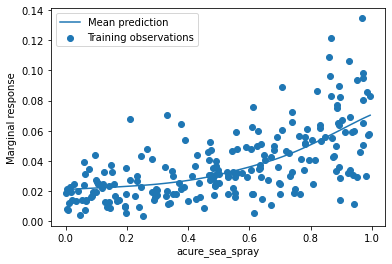

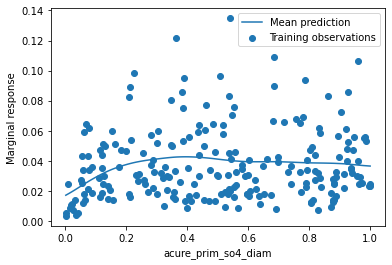

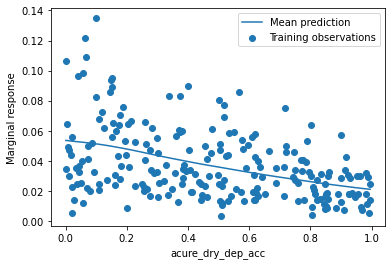

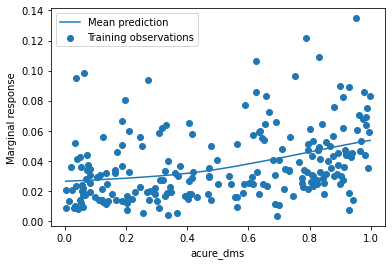

In [35]:
print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

### 9A

In [40]:
inputs_to_train = midocean_selection['next_var'][0:4]

X, y = set_up(midocean, time="9A", inputs=few_inputs, output="soluble_accumulation_mode")

Selected inputs :  0        acure_sea_spray
1    acure_prim_so4_diam
2      acure_dry_dep_acc
3              acure_dms
Name: next_var, dtype: object


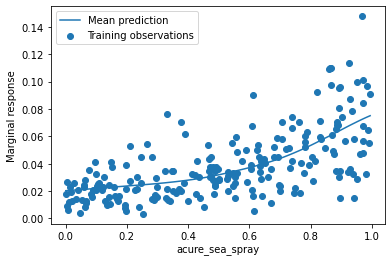

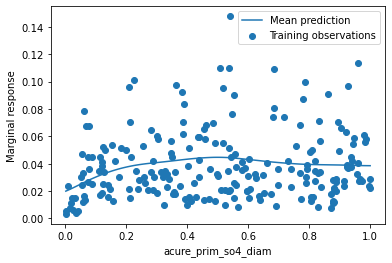

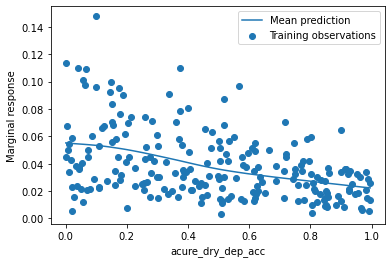

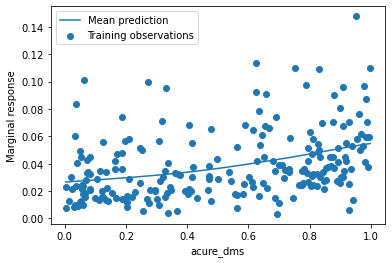

In [41]:
print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

## August 26

[('acure_sea_spray', 1.44894827e+01)
 ('acure_prim_so4_diam', 1.78293836e+01)
 ('acure_dry_dep_acc', 2.01150523e+01)
 ('two_d_fsd_factor', 2.73750767e+01) ('acure_dms', 3.64133707e+01)
 ('acure_bvoc_soa', 6.60878802e+01) ('acure_cloud_ph', 1.15351818e+02)
 ('a_ent_1_rp', 1.34193217e+02) ('acure_sig_w', 1.35597919e+02)
 ('acure_autoconv_exp_lwp', 3.24018071e+03)
 ('acure_convective_plume_scavenging', 3.68335245e+03)
 ('acure_dry_dep_so2', 5.01039789e+03)
 ('acure_anth_so2_r', 5.56582885e+03) ('acure_prim_moc', 6.44942509e+03)
 ('acure_autoconv_exp_nd', 7.52991694e+03)
 ('acure_oxidants_oh', 8.37308343e+03) ('m_ci', 8.44049611e+03)
 ('c_r_correl', 9.06660046e+03) ('acure_anth_so2_nam', 1.10269777e+04)
 ('acure_dry_dep_ait', 1.27864072e+04) ('acure_ait_width', 1.58457958e+04)
 ('bparam', 1.80358369e+04) ('acure_anth_so2_chi', 2.18592160e+04)
 ('ai', 2.21053318e+04) ('acure_anth_so2_asi', 3.12570922e+04)
 ('member', 3.72659314e+04) ('acure_volc_so2', 4.49877606e+04)
 ('acure_anth_so2_eur',

/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/c3/.conda/envs/py-gordon_2_0_0/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

   num_vars                next_var      mean       std
0         1         acure_sea_spray  0.002165  0.000255
1         2     acure_prim_so4_diam  0.001648  0.000774
2         3       acure_dry_dep_acc  0.000703  0.000253
3         4        two_d_fsd_factor  0.000709  0.000338
4         5               acure_dms  0.000385  0.000131
5         6          acure_bvoc_soa  0.000371  0.000176
6         7          acure_cloud_ph  0.000433  0.000240
7         8              a_ent_1_rp  0.000364  0.000185
8         9             acure_sig_w  0.000337  0.000154
9        10  acure_autoconv_exp_lwp  0.000466  0.000285


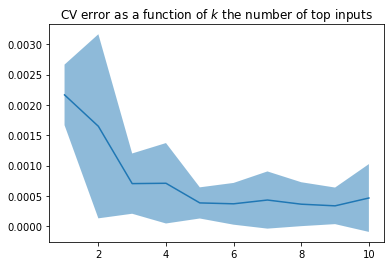

Selected inputs :  0        acure_sea_spray
1    acure_prim_so4_diam
2      acure_dry_dep_acc
3       two_d_fsd_factor
4              acure_dms
Name: next_var, dtype: object


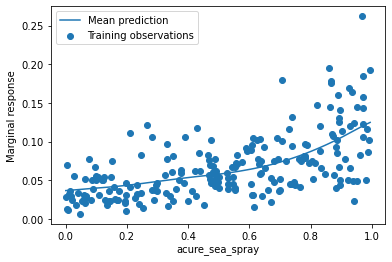

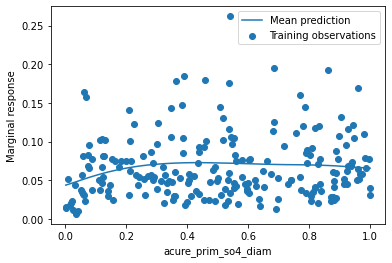

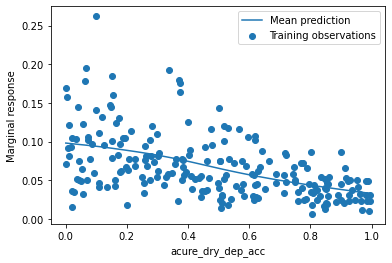

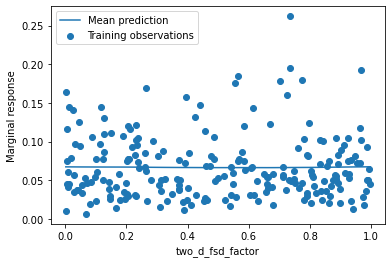

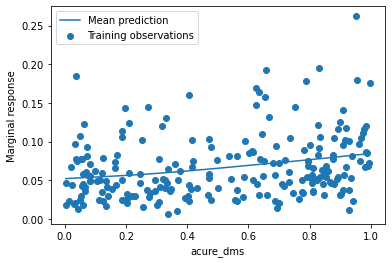

In [18]:
midocean2_ard = check_ard_results(midocean2, "9A", few_inputs, "soluble_accumulation_mode")
print(midocean2_ard)

midocean2_selection = select_vars(midocean2[midocean2.time=="9A"], midocean2_ard, "soluble_accumulation_mode", max_num_vars=10, folds=5)
print(midocean2_selection)

plot_cv_curve(midocean2_selection)

inputs_to_train = midocean2_selection['next_var'][0:5]

X, y = set_up(midocean2, time="12P", inputs=few_inputs, output="soluble_accumulation_mode")

print('Selected inputs : ', inputs_to_train)

for input_to_view in inputs_to_train:
    X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)